In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import datetime as dt
import yfinance as yf 
sns.set_style('whitegrid')

## Download Crypto Data 

In [2]:
# start and end time 
start= dt.datetime(2023,1,1)
end = dt.datetime(2025,11,1)
tickers=['BNB-USD','BTC-USD','ETH-USD','XRP-USD']

#downalod crypto from YFinance
BNB=yf.download('BNB-USD',start,end,auto_adjust=False)
BTC=yf.download('BTC-USD',start,end,auto_adjust=False)
ETH=yf.download('ETH-USD',start,end,auto_adjust=False)
XRP=yf.download('XRP-USD',start,end,auto_adjust=False)

#concate all crypto
crypto_data = {ticker: yf.download(ticker, start=start, end=end, auto_adjust=False) for ticker in tickers}
crypto = pd.concat(crypto_data, axis=1, keys=tickers)
crypto.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BNB-USD                                                      \
Price         Adj Close        Close         High          Low         Open   
Ticker          BNB-USD      BNB-USD      BNB-USD      BNB-USD      BNB-USD   
Date                                                                          
2025-10-27  1139.745972  1139.745972  1180.014893  1134.291016  1137.587646   
2025-10-28  1103.144775  1103.144775  1148.558350  1088.881592  1139.750854   
2025-10-29  1107.163330  1107.163330  1120.729980  1089.768188  1103.149170   
2025-10-30  1078.611450  1078.611450  1123.696899  1050.128296  1107.161987   
2025-10-31  1088.955444  1088.955444  1104.247559  1073.453979  1078.612549   

                              BTC-USD                                \
Price           Volume      Adj Close          Close           High   
Ticker         BNB-USD        BTC-USD        BTC-USD        BTC-USD   
Date                                                                  
2025-10-27  4501355092  114119.328125  114119.328125  116273.312500   
2025-10-28  4178047763  112956.164062  112956.164062  116078.984375   
2025-10-29  4169218996  110055.304688  110055.304688  113642.726562   
2025-10-30  4153774666  108305.546875  108305.546875  111612.351562   
2025-10-31  4399392720  109556.164062  109556.164062  111031.820312   

                           ...      ETH-USD                            \
Price                 Low  ...         High          Low         Open   
Ticker            BTC-USD  ...      ETH-USD      ETH-USD      ETH-USD   
Date                       ...                                          
2025-10-27  113882.289062  ...  4250.669922  4099.569824  4158.010742   
2025-10-28  112291.679688  ...  4173.505371  3940.834229  4120.274902   
2025-10-29  109368.718750  ...  4036.353027  3849.538818  3980.759033   
2025-10-30  106376.687500  ...  3948.222656  3681.909424  3903.322510   
2025-10-31  108288.273438  ...  3900.580322  3797.669189  3805.082764   

                          XRP-USD                                          \
Price            Volume Adj Close     Close      High       Low      Open   
Ticker          ETH-USD   XRP-USD   XRP-USD   XRP-USD   XRP-USD   XRP-USD   
Date                                                                        
2025-10-27  40271333201  2.634630  2.634630  2.693447  2.607439  2.645144   
2025-10-28  39684155177  2.605977  2.605977  2.683330  2.574120  2.634644   
2025-10-29  35255876156  2.552021  2.552021  2.663020  2.543360  2.605963   
2025-10-30  39981939289  2.439715  2.439715  2.589813  2.390291  2.551990   
2025-10-31  37800100395  2.508733  2.508733  2.546718  2.437345  2.439723   

                        
Price           Volume  
Ticker         XRP-USD  
Date                    
2025-10-27  5079861417  
2025-10-28  5654771816  
2025-10-29  5094568015  
2025-10-30  6124183294  
2025-10-31  4637688037  

[5 rows x 24 columns]

## Exploratory Data Analysis 

In [3]:
#Rename multiindex
if crypto.columns.nlevels > 2:
    crypto.columns = crypto.columns.droplevel(-1)  # drops last level (extra ticker repetition)
crypto.columns.names = ['Ticker','Price']

# Find maximum close price for each crypto throughout the time period
display(crypto.xs('Close',axis=1,level='Price').max().round(2))
crypto.head()

Ticker
BNB-USD      1310.21
BTC-USD    124752.53
ETH-USD      4831.35
XRP-USD         3.56
dtype: float64

Ticker         BNB-USD                                                  \
Price        Adj Close       Close        High         Low        Open   
Date                                                                     
2023-01-01  244.136978  244.136978  246.485809  243.575287  246.332901   
2023-01-02  245.535904  245.535904  247.715271  241.692490  244.152222   
2023-01-03  246.133362  246.133362  246.831451  244.784042  245.552139   
2023-01-04  259.119690  259.119690  260.516052  245.704971  246.140900   
2023-01-05  256.422852  256.422852  259.076477  255.596558  259.076477   

Ticker                      BTC-USD                                            \
Price          Volume     Adj Close         Close          High           Low   
Date                                                                            
2023-01-01  278651737  16625.080078  16625.080078  16630.439453  16521.234375   
2023-01-02  357733262  16688.470703  16688.470703  16759.343750  16572.228516   
2023-01-03  377452410  16679.857422  16679.857422  16760.447266  16622.371094   
2023-01-04  632924961  16863.238281  16863.238281  16964.585938  16667.763672   
2023-01-05  342934041  16836.736328  16836.736328  16884.021484  16790.283203   

Ticker      ...      ETH-USD                                         XRP-USD  \
Price       ...         High          Low         Open      Volume Adj Close   
Date        ...                                                                
2023-01-01  ...  1203.475342  1192.885376  1196.713623  2399674550  0.338763   
2023-01-02  ...  1219.860596  1195.214966  1201.103271  3765758498  0.348556   
2023-01-03  ...  1219.095337  1207.491577  1214.744019  3392972131  0.343824   
2023-01-04  ...  1264.807495  1213.168823  1214.718628  6404416893  0.347794   
2023-01-05  ...  1258.571533  1245.173096  1256.484619  4001786456  0.338039   

Ticker                                                          
Price          Close      High       Low      Open      Volume  
Date                                                            
2023-01-01  0.338763  0.339923  0.336332  0.339923   290828851  
2023-01-02  0.348556  0.354105  0.321628  0.338774  1325787126  
2023-01-03  0.343824  0.351049  0.342010  0.348544   811872325  
2023-01-04  0.347794  0.350880  0.342839  0.343831   803671745  
2023-01-05  0.338039  0.348339  0.337517  0.347793   669029812  

[5 rows x 24 columns]

In [4]:
# Select only Close prices
close_prices = crypto.xs('Close', axis=1, level='Price')

# Daily percentage returns
crypto_returns = close_prices.pct_change() * 100

crypto_returns = crypto_returns.dropna()

print(crypto_returns.head())

Ticker       BNB-USD   BTC-USD   ETH-USD   XRP-USD
Date                                              
2023-01-02  0.573009  0.381295  1.140064  2.890816
2023-01-03  0.243328 -0.051612  0.010060 -1.357605
2023-01-04  5.276135  1.099415  3.436659  1.154660
2023-01-05 -1.040769 -0.157158 -0.484511 -2.804817
2023-01-06  1.343213  0.684411  1.514703  1.954207


In [5]:
# Mean daily return
mean_returns = crypto_returns.mean().sort_values(ascending=False)

# Volatility (std of returns)
volatility = crypto_returns.std().sort_values(ascending=False)

print("Mean Daily Returns:\n", mean_returns.round(2))
print("\nDaily Volatility:\n", volatility.round(2))


Mean Daily Returns:
 Ticker
XRP-USD    0.29
BTC-USD    0.21
BNB-USD    0.18
ETH-USD    0.17
dtype: float64

Daily Volatility:
 Ticker
XRP-USD    4.62
ETH-USD    3.32
BNB-USD    2.73
BTC-USD    2.46
dtype: float64


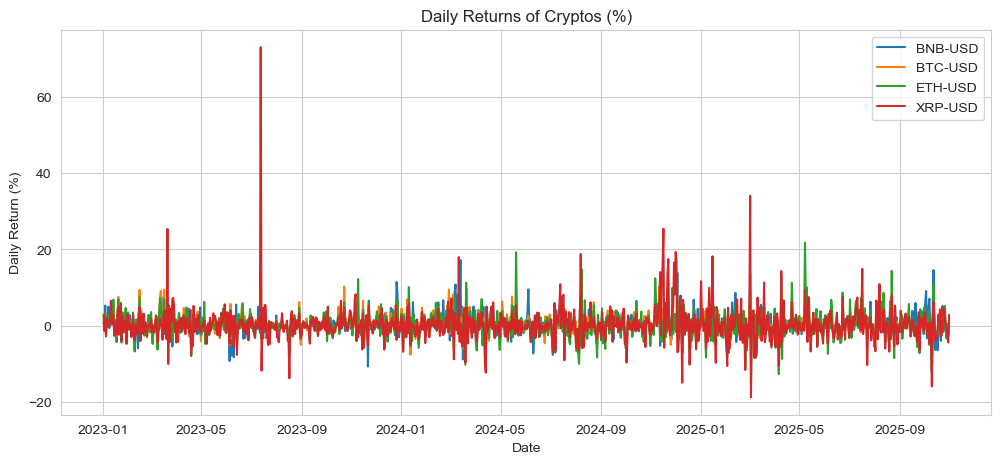

In [6]:
# Plot Daily Returns 
plt.figure(figsize=(12,5))
for col in crypto_returns.columns:
    plt.plot(crypto_returns.index, crypto_returns[col], label=col)
plt.title("Daily Returns of Cryptos (%)")
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.legend()
plt.show()


### 📉 General Volatility and Return Characteristics
**High Volatility:** The most striking feature is the high level of volatility across all four cryptocurrencies. The daily returns frequently swing between approximately -10% and +15%, indicating significant daily price movements.

**Extreme Outliers:** There are several periods of extreme returns, which appear as sharp spikes.The most significant spike is a massive positive daily return for XRP-USD, reaching nearly +80% around mid-2023.The significant daily return spike occurred on July 13, 2023. Multiple sources confirm that XRP's price surged by over 70% to 90% that day matching the observation. [The surge was triggered by a ruling in the long-running lawsuit filed by the U.S. Securities and Exchange Commission (SEC) against Ripple Labs, Inc., the company associated with XRP.](https://www.kitco.com/news/article/2023-07-13/crypto-market-soars-xrp-ruling-bitcoin-hits-highest-price-13-months#:~:text=Sign%20up%20here!,token%20is%20not%20a%20security.)

There are other large positive and negative spikes for all currencies, though less extreme than the XRP event, showing the inherent risk and reward of the crypto market.

**Clustered Volatility:** Periods of high volatility often seem to occur simultaneously for BTC, ETH, and BNB, suggesting that general market sentiment or macroeconomic events often affect these assets together.

In [7]:
# Calculate Cumulative Returns 
cumulative_returns = ((1 + crypto_returns/100).cumprod() - 1)*100
print("\nCumulative Returns (first 5 rows):")
print(cumulative_returns.tail())


Cumulative Returns (first 5 rows):
Ticker         BNB-USD     BTC-USD     ETH-USD     XRP-USD
Date                                                      
2025-10-27  366.846924  586.428743  243.067667  677.720700
2025-10-28  351.854850  579.432301  231.588595  669.262602
2025-10-29  353.500874  561.983607  225.018093  653.335234
2025-10-30  341.805849  551.458798  216.776570  620.183408
2025-10-31  346.042813  558.981271  220.332468  640.556981


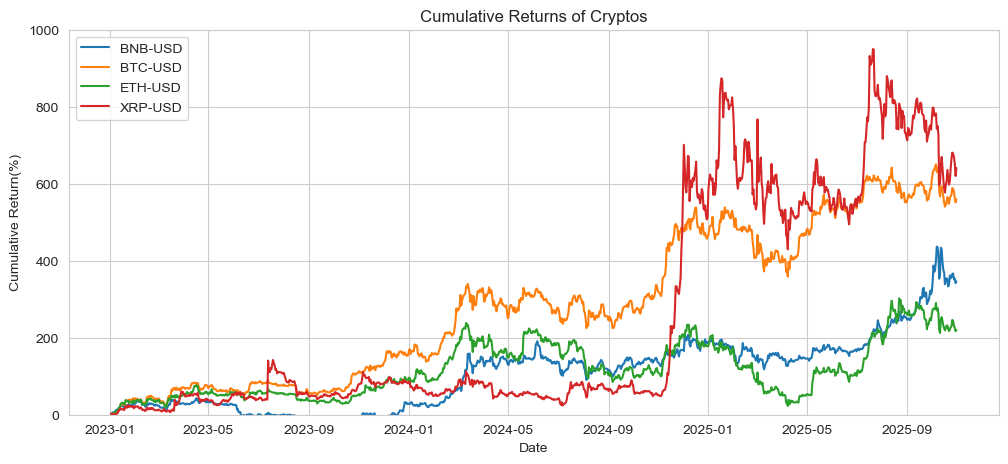

In [8]:
# Plot Cumulative Returns 
plt.figure(figsize=(12,5))
for col in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[col], label=col)
plt.title("Cumulative Returns of Cryptos")
plt.xlabel("Date")
plt.ylabel("Cumulative Return(%)")
plt.legend()
plt.ylim(0,1000)
plt.show()

### 📈 Cumulative Returns (Early 2023 - Late 2025)
This chart illustrates the total, compounded growth of an initial investment in each asset from the start date (early 2023) to the end date (late 2025).

**XRP-USD(Top Performer)** reached a massive cumulative return peak of approximately 900% to 1000% during the early 2025 bull run, closing the period as the overall leader, with a cumulative return between 650% and 700%. **BTC-USD** maintained a consistently high growth path, finishing the period strong at roughly 600% cumulative return. **ETH-USD** closed with approximately 500% cumulative return. **BNB-USD** closed with approximately 400% cumulative return.

The graph shows a synchronized, powerful bull run in late 2024/early 2025, driving all four assets to their cycle highs. Over this period, all four major cryptocurrencies delivered substantial gains, with XRP and BTC providing the highest returns for investors.

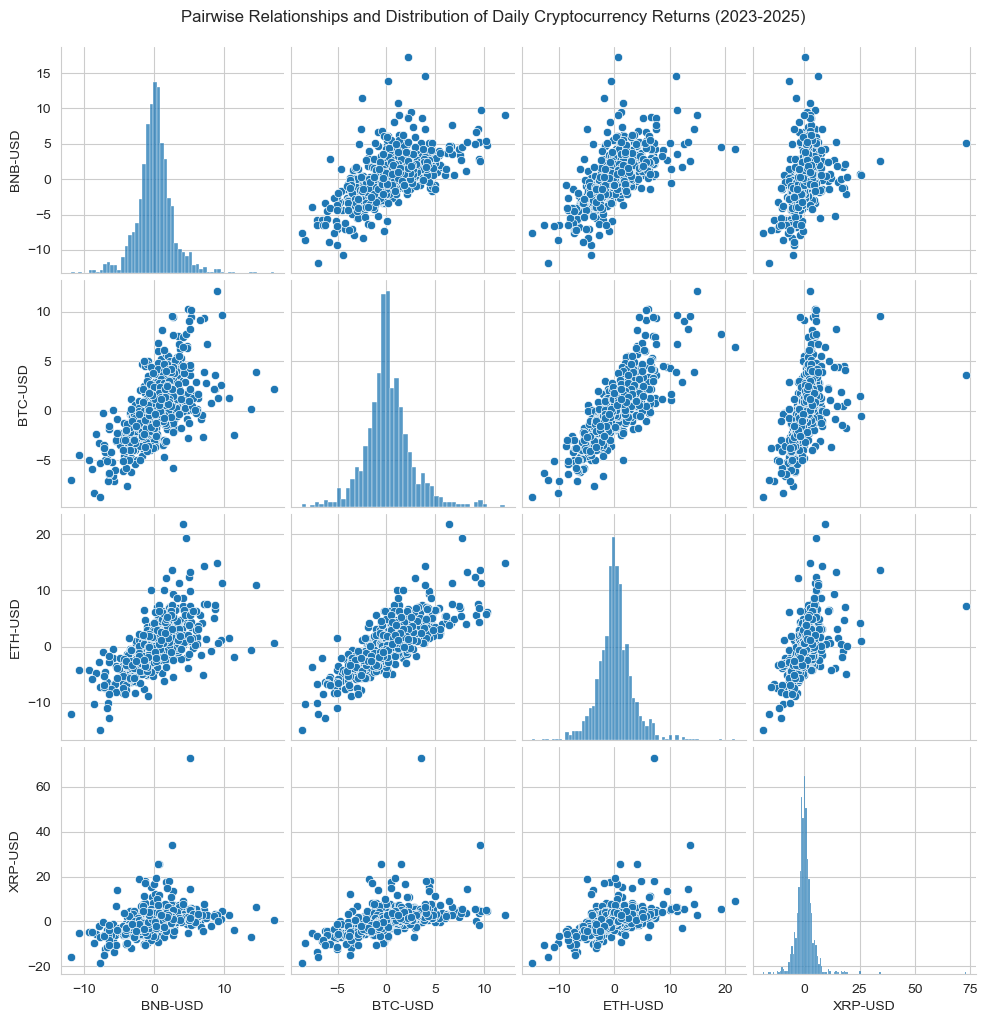

In [9]:
g=sns.pairplot(crypto_returns[1:])
g.fig.suptitle("Pairwise Relationships and Distribution of Daily Cryptocurrency Returns (2023-2025)",y=1.02)
plt.show()

In [10]:
max_dates = crypto_returns.idxmax()
max_values = crypto_returns.max()
min_dates = crypto_returns.idxmin()
min_values = crypto_returns.min()

# Combine the results into a single DataFrame
merge_data = {
    'Maximum Return Date': max_dates,
    'Maximum Return Value': max_values,
    'Minimum Return Date': min_dates,
    'Minimum Return Value': min_values
}

merge_df = pd.DataFrame(merge_data)

display(merge_df)

Maximum Return Date  Maximum Return Value Minimum Return Date  \
Ticker                                                                  
BNB-USD          2024-03-13             17.233970          2025-10-10   
BTC-USD          2024-08-08             12.144256          2025-03-03   
ETH-USD          2025-05-08             21.798769          2025-03-03   
XRP-USD          2023-07-13             73.075005          2025-03-03   

         Minimum Return Value  
Ticker                         
BNB-USD            -11.863459  
BTC-USD             -8.682040  
ETH-USD            -14.847855  
XRP-USD            -18.767825

On March 3, 2025, all three coins—BTC, ETH, and XRP—showed a severe downtrend (daily minimum returns) due to the negative market sentiment surrounding [President Trump's announcement of new tariffs on imports from Canada, Mexico, and China.](https://economictimes.indiatimes.com/markets/cryptocurrency/trump-crypto-rally-fizzles-amid-skepticism-on-reserve-plan/articleshow/118688960.cms?from=mdr)

In [11]:
crypto_returns.loc['2025-01-01':'2025-10-31'].std().sort_values(ascending=False) # Highest volatility found for XRP this year 

Ticker
XRP-USD    4.574834
ETH-USD    4.044057
BNB-USD    2.752360
BTC-USD    2.198554
dtype: float64

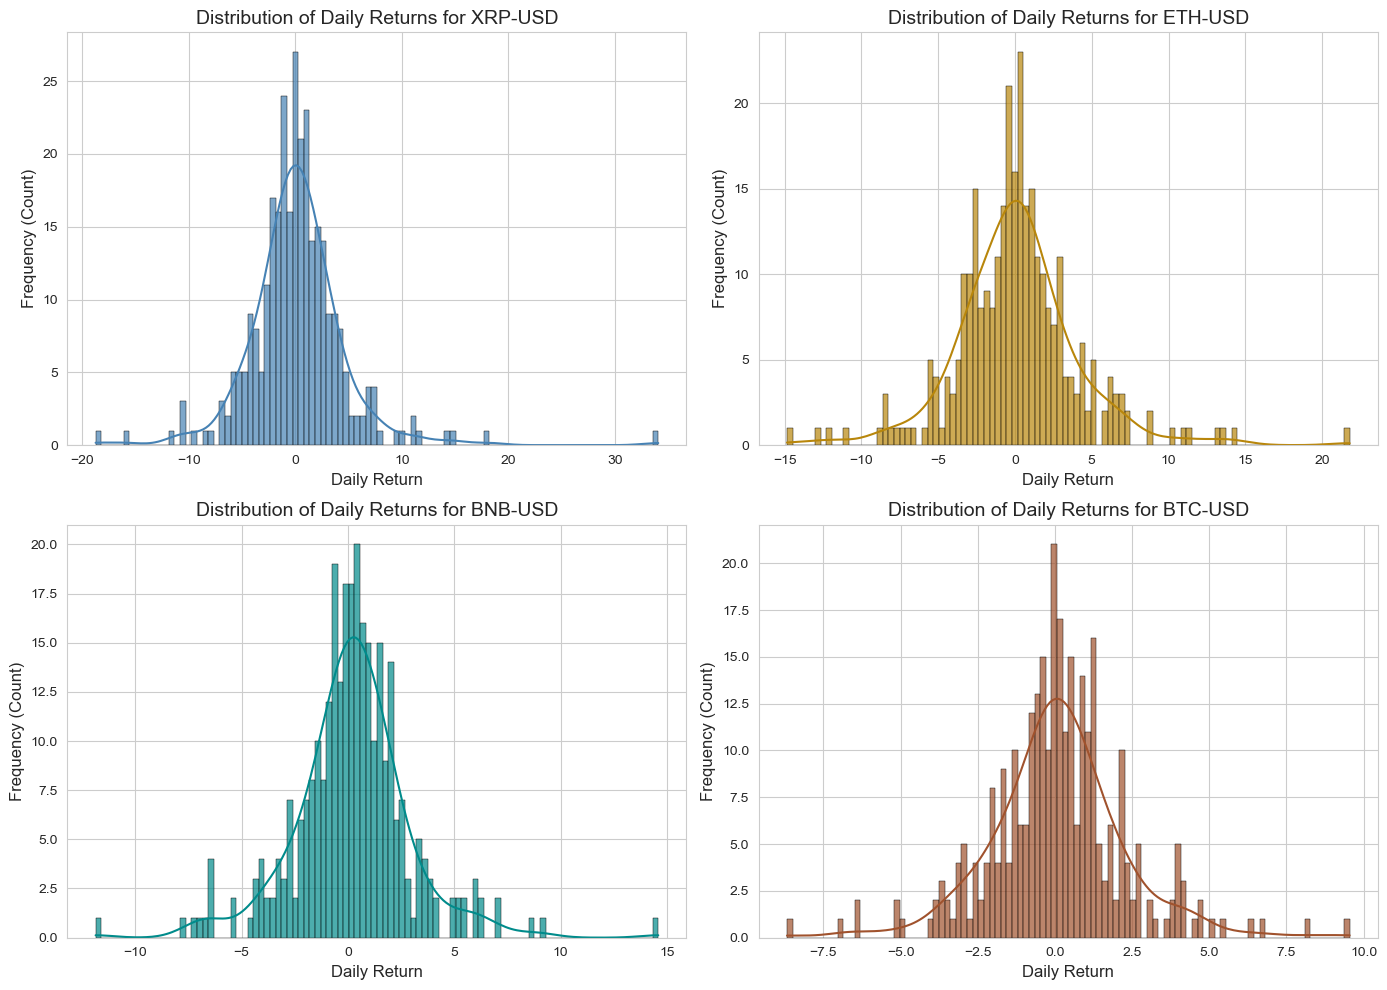

In [12]:
coins = ['XRP-USD', 'ETH-USD', 'BNB-USD', 'BTC-USD']
plot_colors = ['steelblue', 'darkgoldenrod', 'darkcyan', 'sienna']

# Create the figure and a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Flatten the axes array to easily loop through the 4 subplots
axes = axes.flatten()

# Loop through the coins, colors, and plot a histogram for each one
for i, coin in enumerate(coins):
    data_to_plot = crypto_returns.loc['2025-01-01':'2025-10-31'][coin]

    sns.histplot(
        data=data_to_plot,
        ax=axes[i],
        bins=100,
        kde=True,
        color=plot_colors[i], 
        edgecolor='black',
        alpha=0.7,
    )
    
    # Set the title for the specific plot
    axes[i].set_title(f'Distribution of Daily Returns for {coin}', fontsize=14)
    axes[i].set_xlabel('Daily Return', fontsize=12)
    axes[i].set_ylabel('Frequency (Count)', fontsize=12)

plt.tight_layout()
plt.show()

## Moving Averages

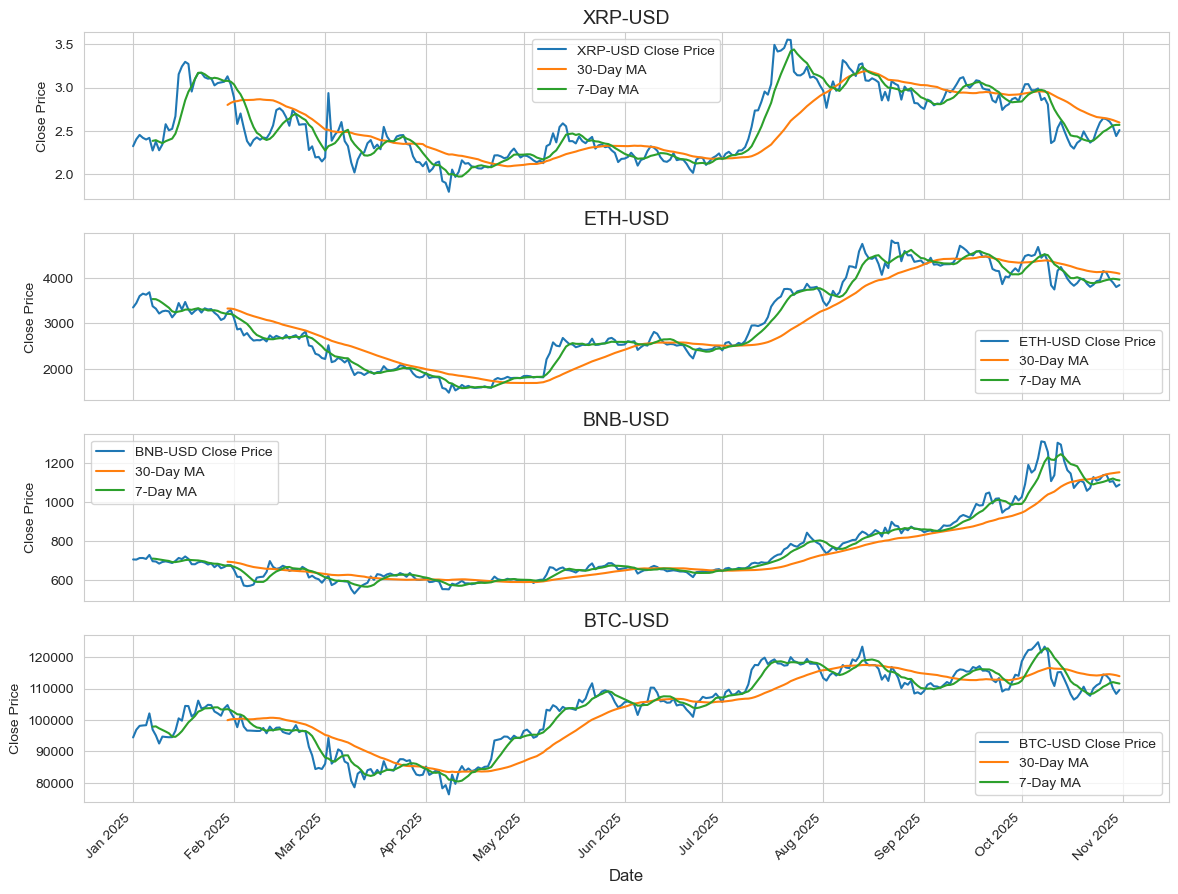

In [13]:
import matplotlib.dates as mdates

coins = ['XRP-USD', 'ETH-USD', 'BNB-USD', 'BTC-USD']
start_date = '2025-01-01'
end_date = '2025-10-31'

# Create the figure and a 4x1 grid of subplots
fig, axes = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

axes = axes.flatten()

for i,coin in enumerate(coins):
    MA_data=crypto[coin]['Close'].loc[start_date:end_date]

    #30 day MA
    crypto_30MA=MA_data.rolling(window=30).mean()
    #7 day MA
    crypto_7MA=MA_data.rolling(window=7).mean()
    
    ax=axes[i]
    ax.plot(MA_data, label= f'{coin} Close Price')
    ax.plot(crypto_30MA, label='30-Day MA')
    ax.plot(crypto_7MA, label='7-Day MA')
    ax.legend()
    ax.set_title(f'{coin}',fontsize=14)
    if i < len(coins) - 1:
        ax.set_xlabel('') 
    else:
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right") 
        ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Close Price')

plt.show()


<Axes: xlabel='Ticker', ylabel='Ticker'>

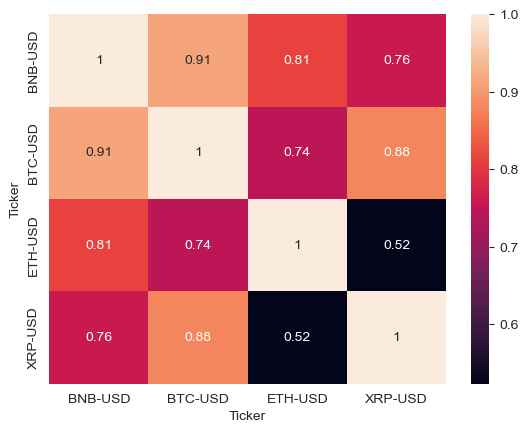

In [14]:
sns.heatmap(crypto.xs('Close', axis=1, level='Price').corr(), annot=True)

In [15]:
import plotly.graph_objects as go

start = '2025-10-01'
end = '2025-10-31'
# Download data for Bank of America
XRP = yf.download('XRP-USD', start,end)

# Keep only OHLC columns
XRP_ohlc = XRP[['Open', 'High', 'Low', 'Close']]

# Remove the tuple-like string formatting
XRP_ohlc.columns = ['Open', 'High', 'Low', 'Close']

fig = go.Figure(data=[go.Candlestick(
    x=XRP_ohlc.index,
    open=XRP_ohlc['Open'],
    high=XRP_ohlc['High'],
    low=XRP_ohlc['Low'],
    close=XRP_ohlc['Close'],
    # Fill color
    increasing_fillcolor='limegreen',
    decreasing_fillcolor='tomato',
    # Border color
    increasing_line_color='green',
    decreasing_line_color='red',
    increasing_line_width=1,   # candle border thickness
    decreasing_line_width=1,
    whiskerwidth=0.005        # wick thickness
)])

fig.update_layout(
    xaxis_rangeslider_visible=False,
    template='plotly_dark',
    title={
        'text': 'XRP-USD Candlestick Chart: October 2025',  # The title text
        'y': 0.9,                                          # Title vertical position (optional)
        'x': 0.5,                                          # Title horizontal position (0.5 is center)
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()


C:\Users\BHUIYAN GADGET\AppData\Local\Temp\ipykernel_17120\3436420239.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  XRP = yf.download('XRP-USD', start,end)
[*********************100%***********************]  1 of 1 completed


C:\Users\BHUIYAN GADGET\AppData\Local\Temp\ipykernel_17120\3581086214.py:3: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


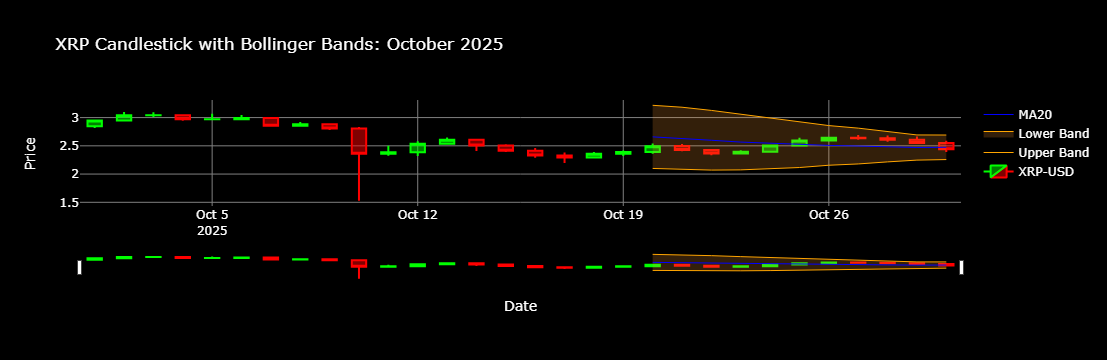

In [17]:
import plotly.graph_objects as go

XRP = yf.download('XRP-USD', start='2025-10-01', end='2025-10-31')

# Flatten multiIndex columns
if isinstance(XRP.columns, pd.MultiIndex):
    XRP.columns = [col[0] for col in XRP.columns]

# Compute Bollinger Bands 
window = 20
XRP['MA20'] = XRP['Close'].rolling(window=window).mean()
rolling_std = XRP['Close'].rolling(window=window).std()
XRP['Upper'] = XRP['MA20'] + 2 * rolling_std
XRP['Lower'] = XRP['MA20'] - 2 * rolling_std

fig = go.Figure()

# Candlestick
fig.add_trace(go.Candlestick(
    x=XRP.index,
    open=XRP['Open'],
    high=XRP['High'],
    low=XRP['Low'],
    close=XRP['Close'],
    name='XRP-USD',
    increasing_line_color='lime', 
    decreasing_line_color='red'   
))

# Upper Band
fig.add_trace(go.Scatter(
    x=XRP.index, y=XRP['Upper'],
    line=dict(color='orange', width=1),
    name='Upper Band'
))

# Lower Band
fig.add_trace(go.Scatter(
    x=XRP.index, y=XRP['Lower'],
    line=dict(color='orange', width=1),
    name='Lower Band',
    fill='tonexty',
    fillcolor='rgba(255,153,51,0.2)'
))

# Moving Average
fig.add_trace(go.Scatter(
    x=XRP.index, y=XRP['MA20'],
    line=dict(color='blue', width=1),
    name='MA20'
))

fig.update_layout(
    title='XRP Candlestick with Bollinger Bands: October 2025',
    xaxis_title='Date',
    yaxis_title='Price',
    plot_bgcolor='black',     
    paper_bgcolor='black',   
    font=dict(color='white'), 
    xaxis=dict(color='white', gridcolor='gray'),
    yaxis=dict(color='white', gridcolor='gray')
)

fig.show()
